# DS2 - Multivariate Analysis

# Assignment 1: Principal Component Analysis (10 points)

The file `aml-chr16.dat` contains RNA-seq data of 285 patients with AML. The index contains the patient ID and the last column contains the FAB category. Perform PCA on the data set and draw biplots of the data projected on the first three components. 

Notes:

* Make sure that the different AML categories can be distinguished in the plot. 
* Only draw lines/arrows for the 25 variables that are most associated with the selected eigenvectors, i.e. have the highest absolute values (loadings) in the eigenvectors.

Consider and discuss the following aspects:

* Is it necessary to normalize the data?
* How many eigenvectors are required to capture the most significant features of the data?
* What is the interpretation of a principal component in this context?


In [102]:
aml.head()

,DDX11L10_16,POLR3K_16,SNRNP25_16,RHBDF1_16,MPG_16,NPRL3_16,HBZ_16,HBM_16,HBA2_16,HBA1_16,...,TUBB3_16,DEF8_16,CENPBD1_16,AFG3L1P_16,DBNDD1_16,GAS8_16,C16orf3_16,URAHP_16,PRDM7_16,FAB
02H009,-0.220577,1.40469,1.42261,-0.352060,1.78287,0.819443,-3.000000,0.576275,1.307820,1.228400,...,-1.100450,0.560743,0.371906,0.505607,-1.605550,0.376230,-1.031660,-0.221943,-3.00000,1
03H033,0.211369,1.23351,1.21952,0.871137,2.08584,1.199380,-0.930591,0.542635,1.726600,1.717140,...,-0.936216,0.885861,0.357906,0.507609,-0.613626,0.459365,-0.892688,-0.107672,-1.43156,1
04H025,-0.013627,1.28971,1.35987,-0.083336,1.65873,1.054850,-0.566518,1.576650,2.991880,2.830650,...,-1.498530,0.656528,0.920067,0.702263,-1.391470,0.610464,-0.501951,0.137107,-1.84924,1
04H108,-1.831210,1.30820,1.26944,-0.571266,1.68465,1.063580,-1.716020,0.790575,1.649600,1.529890,...,-1.068240,0.832776,0.725401,0.733966,-1.046480,0.584761,-0.335885,0.066307,-2.05552,1
05H008,-1.504180,1.34164,1.34731,0.517759,1.58493,0.953472,-1.650720,-1.388600,-0.329838,-0.384155,...,0.394413,0.735963,0.581103,0.947889,-1.379450,0.518481,-0.673459,-0.122088,-2.24336,1


0.06541724311864158 1.4066671662505676
(285, 984)


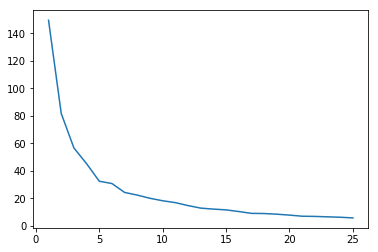

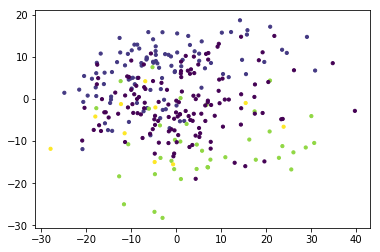

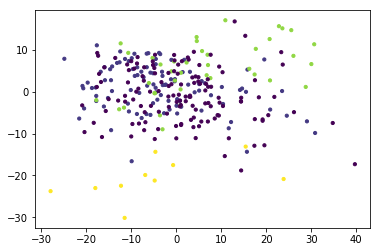

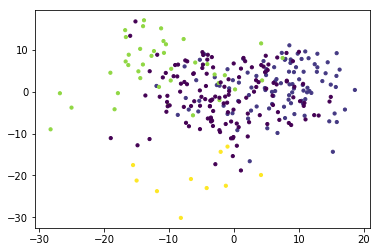

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

aml = pd.read_csv('aml-chr16.dat', sep='\s+')

data = aml.values[:,:-1]
std = data.std(axis=0)
print(std.min(), std.max())

# The standard deviations span several orders of magnitude, so it is probably better to normalize

data -= data.mean(axis=0)
data /= std

cov = np.cov(data.T)

vals, vecs = np.linalg.eigh(cov)
order = vals.argsort()[::-1]
vals = vals[order]
vecs = vecs[:, order]

plt.plot(range(1, 26), vals[:25])
plt.show()

# There is no clear separation between the most important eigenvectors and the 'noise'. 
# It seems that after 6 eigenvectors there is a bit of a jump and thereafter the line is decaying smoothly.
proj = data @ vecs[:, :10]

plt.scatter(proj[:, 0], proj[:, 1], c=aml.iloc[:,-1], s=10)
plt.show()

plt.scatter(proj[:, 0], proj[:, 2], c=aml.iloc[:,-1], s=10)
plt.show()

plt.scatter(proj[:, 1], proj[:, 2], c=aml.iloc[:,-1], s=10)
plt.show()

# In this context an eigenvector is actually a combination of 
# characteristic ranges of RNA-seq expression AND the difference between the classes.


# Assignment 2: Linear Discriminant Analysis (10 points)

The file `aml-PCA10.csv` contains the projections of the AML data on the first ten principal components. The order is the same as that of `aml-chr16.dat`. From this file, consider only the FAB categories 5 and 6. Perform LDA on these and then project the data on the discriminant axis, with the FAB category as y-axis.

Consider and discuss the following aspects:

* Is the assumption of equal covariance matrices reasonable?
* How good is the separation between the two groups?
* What is the interpretation of the discriminant axis in the context of this dataset?
* What is the interpretation of the discriminant axis in the context of the original data (expressions)?

Note: the inverse of the pooled covariance matrix can be obtained with `np.linalg.inv`

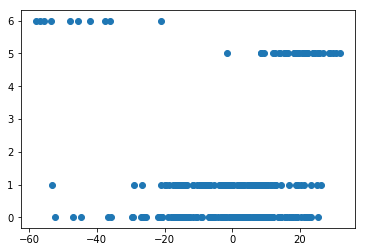

In [115]:
pca10 = pd.read_csv('aml-PCA10.csv').values

# Because of the heterogeneity of the data it is better to work with the overall normalized values.
AML5 = pca10[aml.FAB == 5]
AML6 = pca10[aml.FAB == 6]

cov5 = np.cov(AML5.T)
cov6 = np.cov(AML6.T)

# The equality of the covariance matrices can be formally assessed by comparing the principal components
# and the eigenvalues, or by multiplying one with the inverse of the other. However, the easiest 
# assessment is comparing the distributions in the plots above. A point of concern is the small sample
# size of the data sets, which means that it's hard to assess the difference. But that also means that 
# the dissimilarity can not be established and we may use the pooled matrix as proposed.

pooled = ((AML5.shape[0] - 1) * cov5 + (AML6.shape[0] - 1) * cov6) / (AML5.shape[0] + AML6.shape[0] - 2)

m5 = AML5.mean(axis=0)
m6 = AML6.mean(axis=0)

a = np.linalg.inv(pooled) @ (m5 - m6)

plt.scatter(pca10 @ a, aml.FAB)
plt.show()

# The separation between the groups 5 and 6 is very good. There is no overlap at all.

# The discriminant axis in this context is a pattern in the eigenvectors that is 
# most correlated to the difference between the classes.

# It is possible to transform this back to the original space of the expression data and come
# to a view in which the discriminant axis is a pattern of expression differences that is 
# most distinguishing for the two classes.

# Assignment 3: Multivariate Linear Regression (5 points)

The file `1g59.pdb` contains a structure of tRNA bound to a protein. Having observed that the conformational spaces of protein backbones are highly restricted, the question is whether the same holds for RNA (and DNA). To investigate this, we try to predict the positions of the nucleoside connection point (N1 or N9, connected to the sugar moiety), using the positions of the Phosphorous atoms of the backbone. In the code in the block below, the file is read in and the positions of the phosphorous atoms and connecting atoms are extracted. These are ordered in the regressor matrix X and the regressand matrix Y:

In [107]:
with open('1g59.pdb') as pdb:
    atoms = [ 
        line for line in pdb 
        if (line.startswith('ATOM') and 
            line[21] == 'B' and 
            line[12:16] in (' P  ', ' N1 ', ' N9 '))
    ]

X = np.array([(a[30:38], a[38:46], a[46:54]) for a in atoms]).astype(float)
Y = X[1:-3:2]
X = X[::2]
X = np.stack((X[:-2], X[1:-1], X[2:]), axis=1)
X -= X[:, 1, :][:, np.newaxis, :]
X = X[:, [0,2], :].reshape((-1, 6))

print(X.shape, Y.shape)

(91, 6) (91, 3)


In the next block, implement the multivariate linear regression model (without using sklearn) and investigate the accuracy of the approach. Please note this is a rather 'wicked problem', as it has not been fully precooked ;)

Consider and discuss the following aspects:

* How accurate is the model?
* How feasible is this approach to predict positions of atoms based only on the backbone of RNA/DNA?


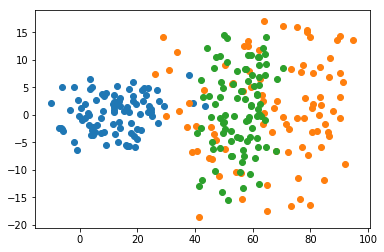

In [109]:
R = np.linalg.inv(X.T @ X) @ (X.T @ Y)
Yhat = X @ R
E = Y - Yhat

D2 = (E ** 2).sum(axis=1)

plt.scatter(Y[:,0], Yhat[:,0])
plt.scatter(Y[:,1], Yhat[:,1])
plt.scatter(Y[:,2], Yhat[:,2])
plt.show()

# The plot suggests that the approach is not very accurate